# Mini-projet : Classification de tumeurs gliales

Les _gliomes_ ou _tumeurs gliales_ sont des tumeurs du glie, le tissu de soutien neuronal du cerveau. Elles sont classifiées en 4 grades anatomo-pathologiques, dont dépend la prise en charge.

Dans ce jeu de données, chaque observation est un gliome, décrit par l'expression de 4 434 gènes. L'expression d'un gène est une mesure de la quantité d'ARN correspondant à ce gène qui est présente dans la cellule. Schématiquement, l'ADN est transcrit en ARN, lequel est lui-même traduit en une protéine. Les protéines assurent une multitude de fonctions du vivant, mais mesurer leur quantité est difficile ; d'où l'intérêt d'utiliser les quantités d'ARN, bien que la correspondance ne soit pas immédiate. 

Chaque gliome de notre jeu de données est étiquetée en fonction de son grade. 

Le but de ce projet est de construire un classifieur qui détermine, sur la base de l'expression de ces 4 434 gènes, le grade d'un gliome.

## Instructions
1. Comparez les performances d'au moins deux algorithmes d'apprentissage sur ce problème de classification.

__Attention :__
* au _data leakage_ (ne pas utiliser les données sur lesquelles on évalue les modèles pour les entraîner ou prétraiter les données)
* à la taille du jeu de données
* au nombre de classes
* à choisir une mesure de performance appropriée (justifiez votre choix)
2. Identifiez, quand cela est possible, les gènes les plus importants pour les modèles que vous avez entraînés. S'agit-il des mêmes gènes
* entre deux modèles obtenus grâce à un algorithme d'apprentissage différents ?
* entre deux modèles obtenus en utilisant le même algorithme d'apprentissage sur des sous-échantillons différents des données ?

N'oubliez pas de commenter et interpréter vos résultats.

## Chargement des données

In [129]:
import scipy.io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

**Load and display of the Data**

In [25]:
data_matrix = scipy.io.loadmat("gliome.mat")

In [26]:
X = data_matrix['X']
print(X.shape)

(50, 4434)


In [27]:
y = data_matrix['Y'][:, 0] 
print(y.shape)

(50,)


In [28]:
for i in range(0, 50) :
    print('Input = ', X[i,:], ' , Label = ', y[i] )

Input =  [1.87794695 1.30103    1.95036485 ... 2.11327469 2.60938094 3.68796571]  , Label =  1
Input =  [2.65103647 2.29021119 2.43658941 ... 1.92947518 2.51964518 3.9517036 ]  , Label =  1
Input =  [2.22110843 2.30232054 3.04513748 ... 1.30103    1.30103    3.7057659 ]  , Label =  1
Input =  [2.16882971 2.12510471 2.99372251 ... 1.30103    1.83807094 3.82636873]  , Label =  1
Input =  [2.57578494 1.70598791 2.51363704 ... 1.410159   1.84760764 4.08229373]  , Label =  1
Input =  [2.28952095 3.0499046  2.91595283 ... 1.30103    1.50880866 3.78513714]  , Label =  1
Input =  [2.11876588 2.83513521 2.88672146 ... 1.43670065 2.0987586  3.73532355]  , Label =  1
Input =  [2.15474007 2.874606   2.74377285 ... 1.30103    1.95164564 3.65227584]  , Label =  1
Input =  [2.23287063 1.8456718  3.07096571 ... 1.30103    2.01466122 3.74096152]  , Label =  1
Input =  [2.4539696  1.85919818 3.08365381 ... 1.30103    1.63250406 3.79734269]  , Label =  1
Input =  [2.10623409 2.1522859  3.09501968 ... 1.3

**Classification with a simple tree**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84, stratify=y)

Text(0.5, 0, 'train labels')

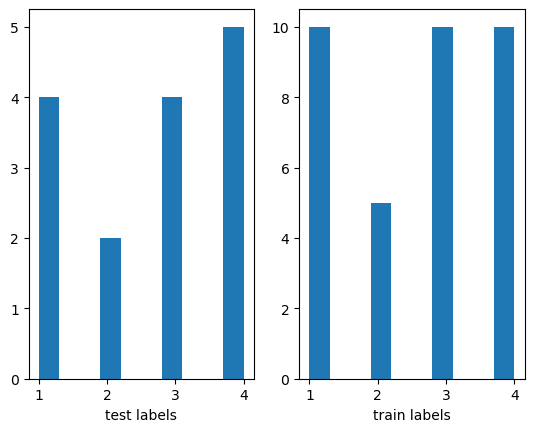

In [104]:
plt.subplot(1, 2, 1)
plt.hist(y_test)
plt.xlabel('test labels')
plt.subplot(1, 2, 2)
plt.hist(y_train)
plt.xlabel('train labels')

We here remark that while having few data, we also have one class that is under-represented.

[Text(0.5, 0.8333333333333334, 'x[1870] <= 3.628\nentropy = 1.95\nsamples = 35\nvalue = [10, 5, 10, 10]'),
 Text(0.25, 0.5, 'x[3044] <= 2.229\nentropy = 1.0\nsamples = 20\nvalue = [0, 0, 10, 10]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.75, 0.5, 'x[3954] <= 2.387\nentropy = 0.918\nsamples = 15\nvalue = [10, 5, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0]')]

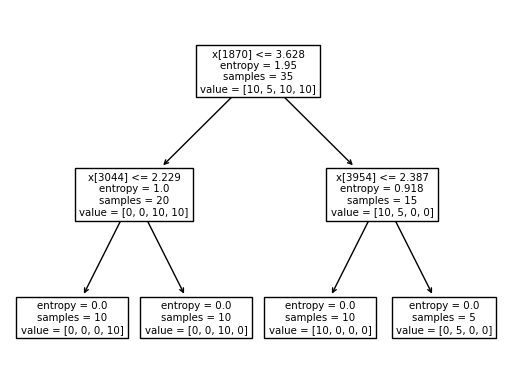

In [105]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, 
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None)
clf = clf.fit(X_train, y_train)

# Graphical view of learnt Decision Tree
tree.plot_tree(clf)

Let's display the results of the training on the test set

In [106]:
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=1e-07)
Acuracy (on test set) =  0.7333333333333333
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.50      0.50      0.50         2
           3       1.00      0.50      0.67         4
           4       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.69        15
weighted avg       0.77      0.73      0.72        15


 CONFUSION MATRIX
[[3 1 0 0]
 [1 1 0 0]
 [0 0 2 2]
 [0 0 0 5]]


Let's try to optimize the hyper parameters with using cross validation

In [151]:
param_grid = [
  {'criterion': ['entropy', 'log_loss', 'gini'],
   'max_depth': [2, 3, 4, 5, 6], 
   'min_samples_split':[2, 3, 4, 5]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible f1 score)
clf = GridSearchCV( tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=4, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None), 
                   param_grid, cv=3, scoring='accuracy') 
    
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

[{'criterion': ['entropy', 'log_loss', 'gini'], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4, 5]}]
Best parameters set found on development set:

{'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 2}

Grid scores on development set:

0.626 (+/-0.178) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
0.712 (+/-0.173) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 3}
0.551 (+/-0.379) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 4}
0.712 (+/-0.107) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}
0.573 (+/-0.223) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.601 (+/-0.145) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}
0.515 (+/-0.143) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4}
0.604 (+/-0.188) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}
0.684 (+/-0.096) for {'criterion': 'entropy', 'max_

A simple tree have already some good results (the acuracy is 0.778 for the best set of hyper parameters) but we could try to improve it by using random forest and diminishing the noise

Now let's use random forest and see the results

In [152]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_leaf_nodes=None, min_impurity_decrease=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None)
clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=",clf.max_depth,
      "max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

n_estimators= 100  max_depth= 5 max_features= sqrt
RandomForestClassifier(max_depth=5, min_impurity_decrease=1e-07, n_jobs=1)
Acuracy (on test set) =  0.7333333333333333
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.00      0.00      0.00         2
           3       1.00      0.75      0.86         4
           4       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.61      0.62      0.61        15
weighted avg       0.70      0.73      0.71        15


 CONFUSION MATRIX
[[3 1 0 0]
 [2 0 0 0]
 [0 0 3 1]
 [0 0 0 5]]


Again we are using cross validation to find the best couples of hyper parameters

In [157]:
param_grid = [
  {'n_estimators': [20,50,100,150,200,250,500], 
   'max_features':["sqrt", "log2"],
   'max_depth': [2, 3, 4, 5,]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV(RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_leaf_nodes=None, min_impurity_decrease=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None), 
                   param_grid, cv=3, scoring='balanced_accuracy') 
    
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Balanced acuracy (on best params) = ", clf.best_score_)

y_true, y_pred = y_test, clf.predict(X_test)
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()

[{'n_estimators': [20, 50, 100, 150, 200, 250, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [2, 3, 4, 5]}]
Best parameters set found on development set:

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}

Balanced acuracy (on best params) =  0.8541666666666666

 CONFUSION MATRIX
[[4 0 0 0]
 [1 1 0 0]
 [0 0 2 2]
 [0 0 0 5]]

Grid scores on development set:

0.556 (+/-0.071) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 20}
0.729 (+/-0.118) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 50}
0.771 (+/-0.236) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
0.660 (+/-0.079) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 150}
0.660 (+/-0.079) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 200}
0.639 (+/-0.071) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 250}
0.639 (+/-0.071) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 500}
0.701 (+/-0.137) for {'max_depth': 2, 'max

We obtain a pretty good result with a balanced acuracy of 85% on the set {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200} and the confusion matrix appears to be quite fine. The first and the last class seems to be well predicted while the other two have some issues. It also appears that data seems separable in 2 classes (confirm by the kmeans part, where the class 1 and 2 form a class and the 3 and 4 another one) but the distinction inside is more difficult. The results we obtain are good but the lack of data is a real problem to have more precise results.

**Discussion of the metric used**

By default we used the acuracy but we managed to see that the second class was often misclassified. Therefore we suspect the few amount of data concerning this class and try to find a way to skirt the problem by using the 'balanced acuracy' metrics.

**Conclusion**

But this conduce us to think more about the metrics we use and why. 